# Milestones 1

- Nama      : Sihar Pangaribuan
- Batch     : HCK-005

###  Dataset & Looker Studio links 

- [DATASET](https://www.kaggle.com/datasets/komalkhetlani/apple-iphone-data)
- [TABLEAU](https://public.tableau.com/views/Milestone1_16818223640860/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

### Problem Statement

Menganalisa karakteristik dan kepuasan pembeli iphone melalui market place flipkart untuk meningkatkan peluang pasar yang lebih baik di negara India

### Penjabaran Masalah dengan 5W + 1H:

- Bagaimana tingkat kepuasan pembeli terhadap penjualan iphone di India?
- Apa saja 10 produk yang harganya paling mahal?
- Apa saja 10 produk yang harganya paling murah?
- Apa saja 10 produk yang paling banyak di review?
- Apa saja 10 produk yang ratingnya paling tinggi?
- Apa saja 10 produk yang diskonnya paling besar?
- Apakah terdapat corelasi antara diskon persentage dengan Number of review?
- Apakah pelanggan lebih menyukai harga yang murah atau discount yang lebih besar?

### Import library

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

### Data Loading

In [59]:
df = pd.read_csv('apple_products.csv')

In [60]:
pd.set_option('display.max_columns', None)
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


### Exploratory Data

In [61]:
# Melihat jumlah baris dan kolom dari data 
df.shape

(62, 11)

In [62]:
# Melihat unik dari kolom star rating 
df['Star Rating'].unique()

array([4.6, 4.5, 4.7])

Dari hasil ini ditemukan kategorei rating hanya 3, yaitu rating 4.6 , 4.5 , 4.7

In [63]:
# Melakukan pengecekan type data
df.dtypes

Product Name            object
Product URL             object
Brand                   object
Sale Price               int64
Mrp                      int64
Discount Percentage      int64
Number Of Ratings        int64
Number Of Reviews        int64
Upc                     object
Star Rating            float64
Ram                     object
dtype: object

In [64]:
# Melakukan pengecekan type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [65]:
# Melakukan pengecekan duplikate dalam kolom produk name
df['Product Name'].duplicated().value_counts()

False    62
Name: Product Name, dtype: int64

In [66]:
# Melakukan pengecekan missing value
df.isna().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

Tidak ada ditemukan missing value

In [67]:
#Pemisahan kolom data berdasarkan type data guna untuk mempermudah analisa
df_num = df.select_dtypes(include=['int', 'float'])
df_cat = df.select_dtypes(include=['object'])


### Analisa Statistik deskriptif

In [68]:
# Melihat Sebaran data kolom numerik
df_num.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [69]:
# Melihat Sebaran data kolom kategorik
df_cat.describe()

,Product Name,Product URL,Brand,Upc,Ram
count,62,62,62,62,62
unique,62,62,1,62,4
top,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,MOBEXRGV7EHHTGUH,4 GB
freq,1,1,62,1,29


Dari hasil analisa berikut ditemukan bahwa APPLE iPhone 8 Plus (Gold, 64 GB) jadi iphone yang paling laku 

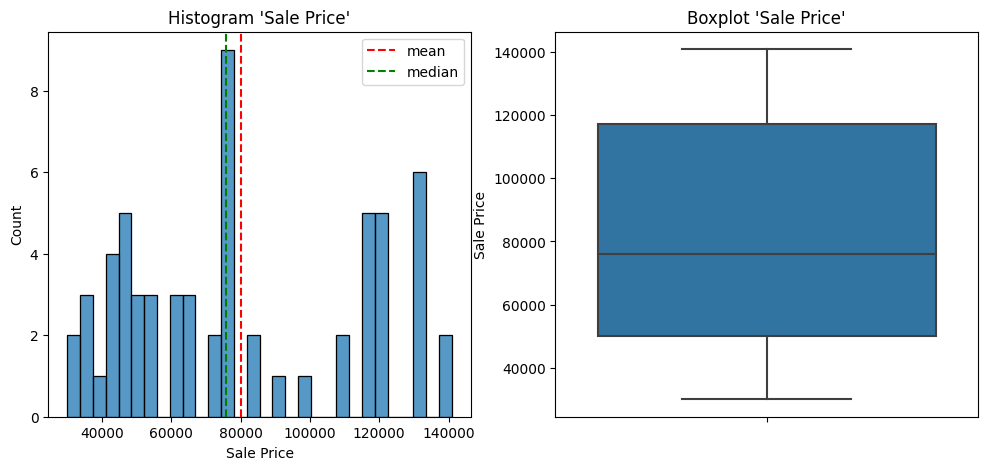

In [70]:
# Cek distribusi dan outliers pada kolom sale price
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))
sns.histplot(df['Sale Price'],ax = axes[0], bins=30)
axes[0].set_title(f"Histogram '{'Sale Price'}'")
axes[0].axvline(df['Sale Price'].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
axes[0].axvline(df['Sale Price'].median(), color = 'green', linestyle = 'dashed', label = 'median')
axes[0].legend()

sns.boxplot(y=df['Sale Price'], ax =  axes[1])
axes[1].set_title(f"Boxplot '{'Sale Price'}'")
plt.show()

Dari hasil distribusi bisa dilihat kalo skewnya bisa dibilang normal dan outliersnya tidak ada

Penaganan Outlier dengan STD karena distribusinya termasuk normal 

In [71]:
limit_upper = df['Sale Price'].mean() + 3 * df['Sale Price'].std()
limit_lower = df['Sale Price'].mean() - 3 * df['Sale Price'].std()
print(limit_upper)
print(limit_lower)

183005.22549407888
-22857.451300530476


In [72]:
# Mengambil data yang berada pada outlier
data_outlier = df[(df['Sale Price'] > limit_upper) | (df['Sale Price'] < limit_lower)]


# Mengambil data yang tidak ada outlier
data_nooutlier = df[~((df['Sale Price'] > limit_upper) | (df['Sale Price'] < limit_lower))]


In [73]:
# Mencari mean load_weight dari df_new sebelum dilakukan penaganan outliers
print('Mean sebelum dibersihkan outliers ' ,df['Sale Price'].mean())
# Mencari median load_weight dari df_new sebelum dilakukan penaganan outliers
print('Median sebelum dibersihkan outliers ', df['Sale Price'].median())

# Mencari mean load_weight dari df_new setelah dibersihkan outliers
print('Mean sesudah dibersihkan outliers ', data_nooutlier['Sale Price'].mean())
# Mencari median load_weight dari df_new setelah dibersihkan outliers
print('Median sesudah dibersihkan outliers ', data_nooutlier['Sale Price'].median())

Mean sebelum dibersihkan outliers  80073.8870967742
Median sebelum dibersihkan outliers  75900.0
Mean sesudah dibersihkan outliers  80073.8870967742
Median sesudah dibersihkan outliers  75900.0


### Penyelesaian Penjabaran Masalah

<Axes: ylabel='Star Rating'>

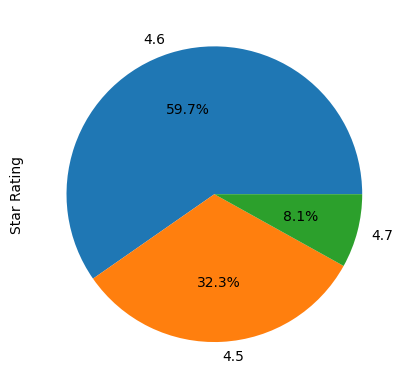

In [74]:
# Melihat persentasi kepuasan pembeli 
df['Star Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')


Dari hasil plot dapat dilihat kalau tingkat kepuasan pembelinya hanya sedang sedang saja, artinya tidak terlalu puas dan tidak terlalu kecewa

In [75]:
# Melakukan filter 10 Iphone dengan harga termahal dan termurah
data1 = df.sort_values('Sale Price', ascending=False)
iphone_termahal = data1.head(10)

data2 = df.sort_values('Sale Price', ascending=True)
iphone_termurah = data2.head(10)

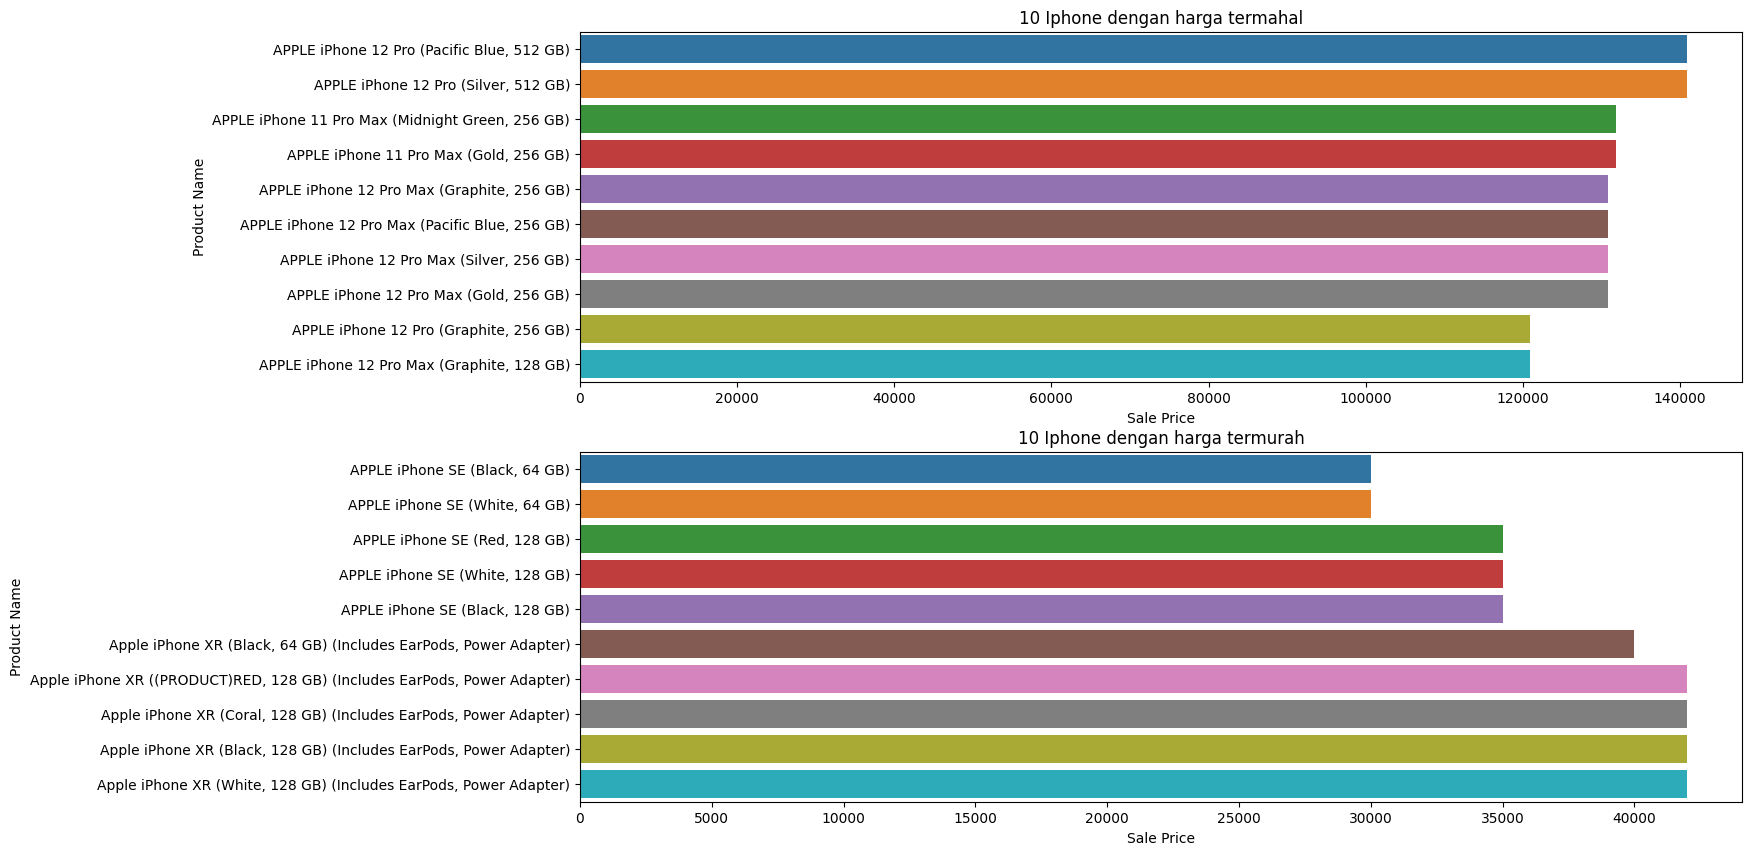

In [76]:
# Melakukan visualisasi 10 Iphone dengan harga termahal dan termurah
fig, axes = plt.subplots(nrows = 2, figsize = (15, 10))
sns.barplot(y='Product Name', x='Sale Price',ax=axes[0],data=iphone_termahal)
axes[0].set_title("10 Iphone dengan harga termahal")


sns.barplot(y='Product Name', x='Sale Price',ax=axes[1],data=iphone_termurah)
axes[1].set_title("10 Iphone dengan harga termurah")

plt.show()

Dari hasil visualisasi didapat iphone termahal adalah Iphone 12 pro 512 GB dan iphone termurah adalah Iphone SE 64 GB

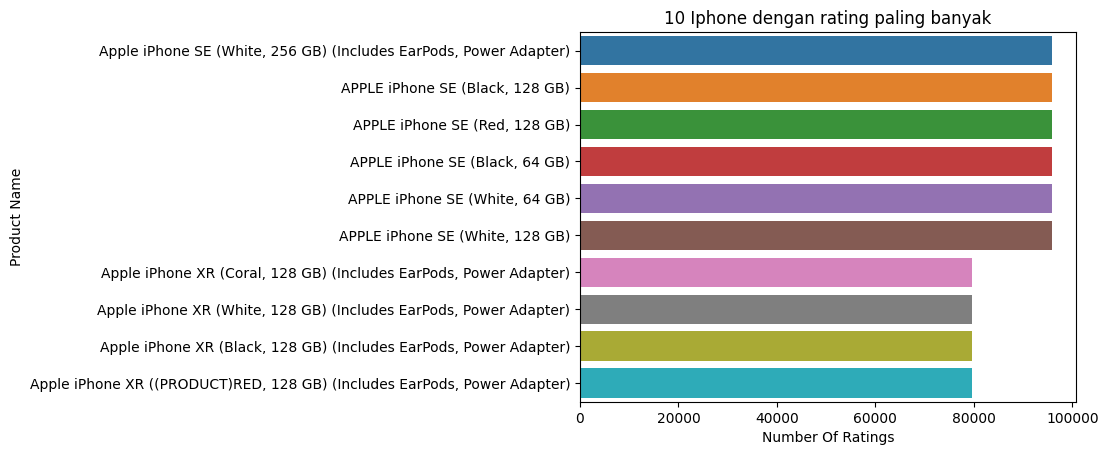

In [77]:
data3 = df.sort_values('Number Of Ratings', ascending=False)
top_10_ratings = data3.head(10)
sns.barplot(y='Product Name', x='Number Of Ratings',data=top_10_ratings)
plt.title('10 Iphone dengan rating paling banyak')
plt.show()

Dari hasil visualisasi didapat bahwa phone yang paling banyak di review adalah Iphone SE

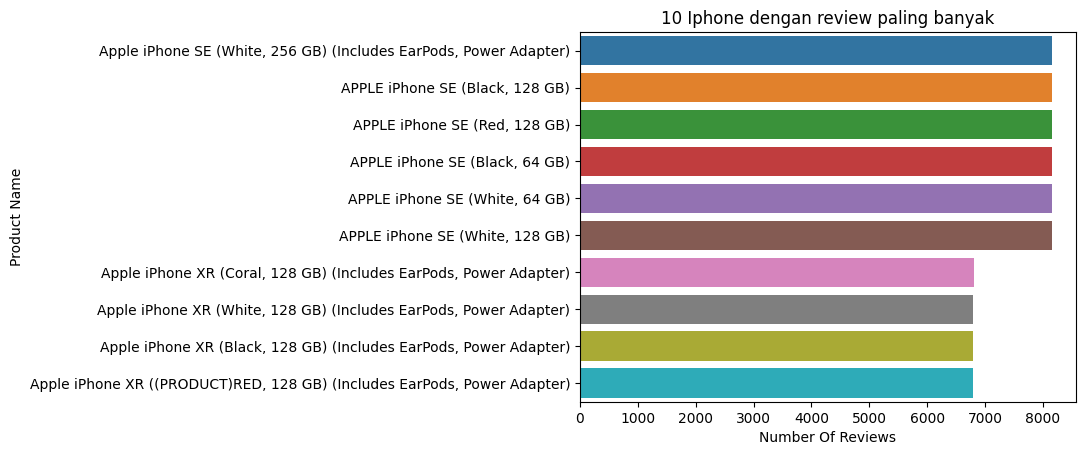

In [78]:
data4 = df.sort_values('Number Of Reviews', ascending=False)
top_10_review = data4.head(10)
sns.barplot(y='Product Name', x='Number Of Reviews',data=top_10_review)
plt.title('10 Iphone dengan review paling banyak')
plt.show()

Dari hasil visualisai dapat dilihat bahwa produk phone yang paling banyak di review adalah Iphone SE 

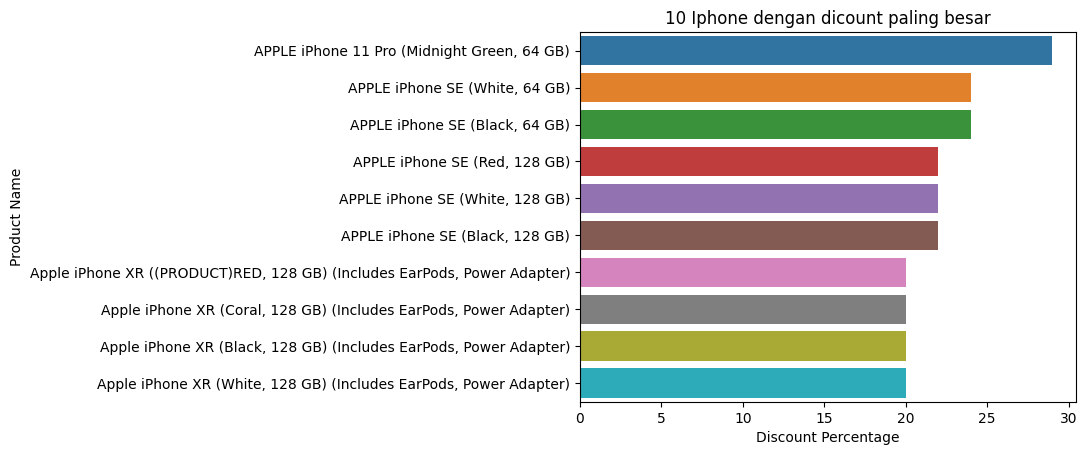

In [79]:
data5 = df.sort_values('Discount Percentage', ascending=False)
top_10_discount = data5.head(10)
sns.barplot(y='Product Name', x='Discount Percentage',data=top_10_discount)
plt.title('10 Iphone dengan dicount paling besar')
plt.show()

Dari visualisasi diatas produk iphone dengan discount terbesar adalah iphone 11 pro midnight green 64 GB

In [80]:
df_num.corr()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
Sale Price,1.000000,0.985108,-0.569603,-0.701526,-0.696029,0.303772
Mrp,0.985108,1.000000,-0.434340,-0.670093,-0.664651,0.264509
Discount Percentage,-0.569603,-0.434340,1.000000,0.684827,0.685877,-0.348479
Number Of Ratings,-0.701526,-0.670093,0.684827,1.000000,0.999084,-0.224977
Number Of Reviews,-0.696029,-0.664651,0.685877,0.999084,1.000000,-0.227863
Star Rating,0.303772,0.264509,-0.348479,-0.224977,-0.227863,1.000000


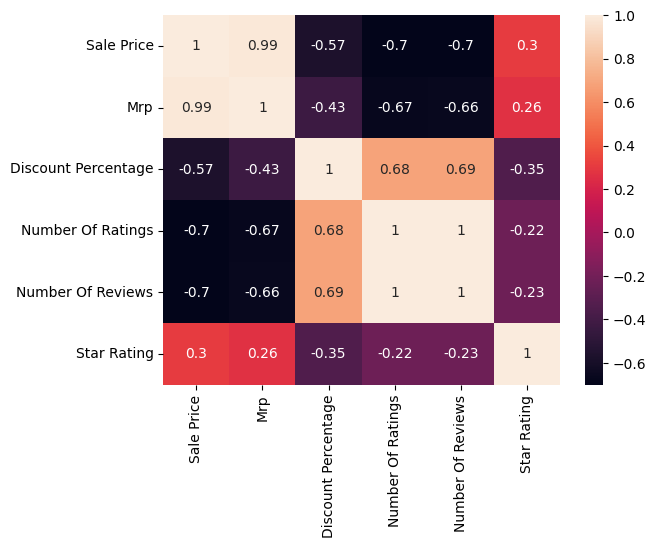

In [81]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

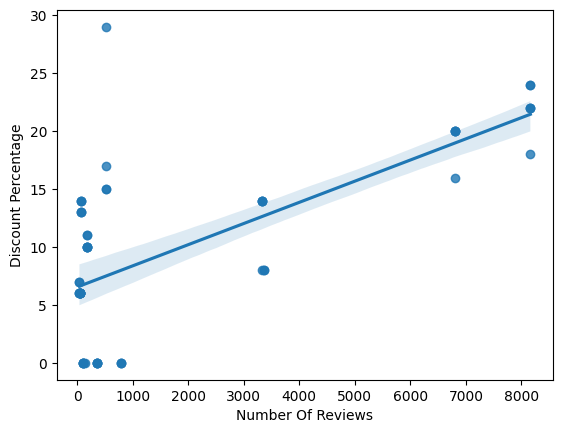

In [82]:
sns.regplot(x='Number Of Reviews',y='Discount Percentage', data=df)
plt.show()

Dari hasil korelasi dapat dilihat positif korelasi antara discount persentage dengan number of reviews dengan ini dapat di analisa bahwa semakin tinggi discountnya maka semakin besar juga nilai belinya 

### Analisa statistik inferensial

Uji Hipotesis dengan menggunakan T Test

HO : Minat pembeli lebih besar kalau discountnya lebih besar <br>
H1 : Minat pembeli lebih besar kalau harganya lebih murah 

In [83]:
ttest = stats.ttest_ind(a=df['Discount Percentage'],b=df['Sale Price'])
pvalue = ttest.pvalue
print('P-value: ' ,pvalue)

P-value:  6.108081449359181e-37


In [84]:
if pvalue >= 0.05:
    print('Terima HO')
else:
    print('Terima H1')

Terima H1


Dari hasil T Test dapat disimpulkan bahwa pembeli lebih menyukai kalau discountnya lebih besar

### Kesimpulan

Dari hasil analisis, pembeli iphone di india lebih cenderung menyukai iphone dengan harga yang rendah dan juga diskon yang besar, untuk iphone dengan harga yang mahal lebih sedikit diminati, untuk menambah sales atau profit sebaiknya diperbanyak produk iphone yang harganya lebih murah dan diskon lebih besar.